In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape, Conv2DTranspose, Conv2D, LeakyReLU
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define hyperparameters
img_rows, img_cols = 28, 28
latent_dim = 100

In [4]:
# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

In [5]:
# Reshape and normalize data
x_train = x_train.reshape(-1, img_rows, img_cols, 1)
x_train = x_train.astype('float32') / 255.0

In [7]:
# Define the Discriminator model
def build_discriminator():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(img_rows, img_cols, 1)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(64, kernel_size=3, strides=2))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [8]:
discriminator = build_discriminator()

In [9]:
# Define the Generator model
def build_generator():
  model = Sequential()
  model.add(Dense(7 * 7 * 64, activation='relu', input_dim=latent_dim))
  model.add(Reshape((7, 7, 64)))
  model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu'))
  model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model


In [10]:
generator = build_generator()

In [12]:
# Define the combined GAN model (for training the discriminator)
discriminator.trainable = False
gan_model = Sequential()
gan_model.add(generator)
gan_model.add(discriminator)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
# Training loop
epochs = 1000
batch_size = 32

In [14]:
for epoch in range(epochs):
  # Train Discriminator on real and generated images
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  real_images = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
  generated_images = generator.predict(noise)

  real_labels = np.ones((batch_size, 1))
  fake_labels = np.zeros((batch_size, 1))

  discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
  discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
  discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

  # Train Generator on fooling the discriminator
  noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
  gen_labels = np.ones((batch_size, 1))
  gan_loss = gan_model.train_on_batch(noise, gen_labels)

  # Print progress
  print(f"Epoch: {epoch+1}, d_loss: {discriminator_loss}, g_loss: {gan_loss}")

1/1 [==============================] - 0s 107ms/step


2024-03-28 13:35:13.973097: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential/leaky_re_lu_1/LeakyRelu/LeakyReluGrad' exist for missing node 'sequential/conv2d_1/BiasAdd'.


Epoch: 1, d_loss: [0.69440001 0.34375   ], g_loss: 0.6876867413520813
1/1 [==============================] - 0s 13ms/step
Epoch: 2, d_loss: [0.66676548 0.5       ], g_loss: 0.681951642036438
1/1 [==============================] - 0s 15ms/step
Epoch: 3, d_loss: [0.64961466 0.5       ], g_loss: 0.676551342010498
1/1 [==============================] - 0s 13ms/step
Epoch: 4, d_loss: [0.62652451 0.5       ], g_loss: 0.6676719784736633
1/1 [==============================] - 0s 13ms/step
Epoch: 5, d_loss: [0.61107612 0.5       ], g_loss: 0.65842604637146
1/1 [==============================] - 0s 13ms/step
Epoch: 6, d_loss: [0.59649697 0.5       ], g_loss: 0.6478841304779053
1/1 [==============================] - 0s 13ms/step
Epoch: 7, d_loss: [0.58087599 0.5       ], g_loss: 0.6427456140518188
1/1 [==============================] - 0s 14ms/step
Epoch: 8, d_loss: [0.551136 0.5     ], g_loss: 0.6452195644378662
1/1 [==============================] - 0s 12ms/step
Epoch: 9, d_loss: [0.53623638 0.

1/1 [==============================] - 0s 16ms/step


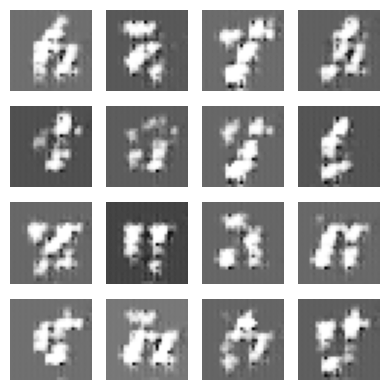

In [19]:
# Generate and plot images
noise = np.random.normal(0, 1, size=(16, latent_dim))
generated_images = generator.predict(noise)

plt.figure(figsize=(4, 4))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(generated_images[i, :, :, 0], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()
